https://www.tensorflow.org/tutorials/keras/classification

In [39]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

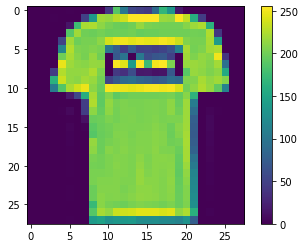

In [24]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

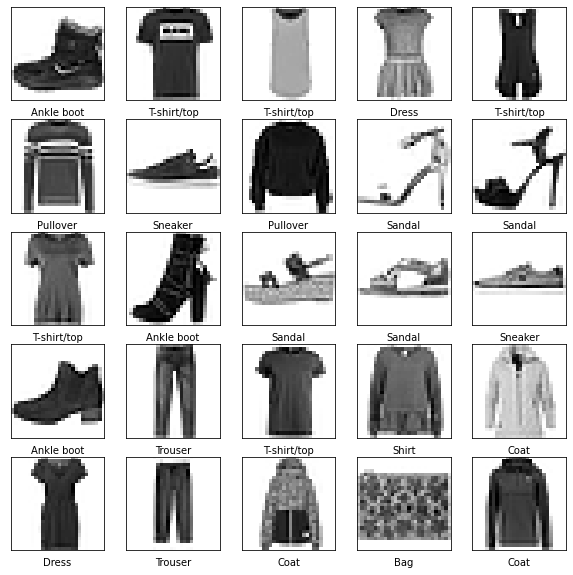

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10),
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.4985 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.3759 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.3350 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.3147 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.2943 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 1s 794us/step - loss: 0.2779 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.2669 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2545 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.2442 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 2s 808u

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3314 - accuracy: 0.8840 - 249ms/epoch - 796us/step

Test accuracy: 0.8840000033378601


In [41]:
model.predict(test_images)[0]

313/313 [==============================] - 0s 533us/step


array([-10.014798  , -15.860721  , -14.198906  , -16.555471  ,
       -11.402228  ,  -2.8893828 , -10.227661  ,  -0.03911798,
       -10.091218  ,   4.4431357 ], dtype=float32)

In [36]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 524us/step


In [38]:
predictions[0]

array([5.1979794e-07, 1.5030818e-09, 7.9195264e-09, 7.5033602e-10,
       1.2980196e-07, 6.4619386e-04, 4.2013500e-07, 1.1174221e-02,
       4.8155488e-07, 9.8817807e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])


9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

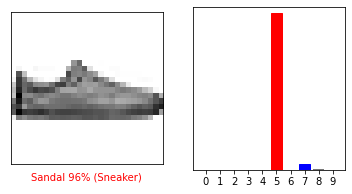

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


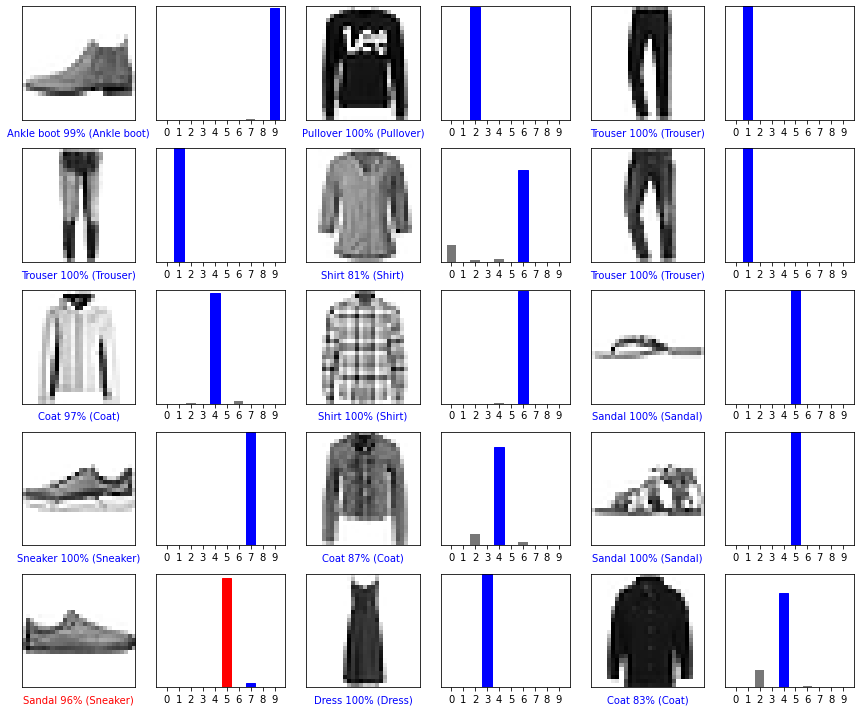

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [57]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [59]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 12ms/step
[[8.4594329e-05 3.1809624e-13 9.9839360e-01 1.3531055e-12 1.3208886e-03
  5.8768268e-12 2.0089150e-04 7.6767065e-12 3.3475922e-10 6.9710909e-13]]


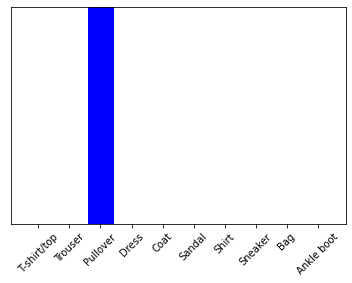

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [ ]:
np.argmax(predictions_single[0])
